In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from models.linear_hp import hp_invert

In [44]:
df_results_expert = pd.read_pickle('./results/results_15T.pkl')
df_results_IL = pd.read_pickle('./results/results_30T.pkl')

In [45]:
# For 15-minute resolution
date_index_expert = pd.date_range(start='2021-08-01 00:00:00', periods=len(df_results_expert), freq='15min')
df_results_expert.index = date_index_expert
df_results_expert['EER'] = df_results_expert['Q_cool'] * df_results_expert['EER'] / (df_results_expert['Q_cool'] + 1e-3)
df_results_expert['e_hp'] = df_results_expert['Q_cool'] * df_results_expert['e_hp'] / (df_results_expert['Q_cool'] + 1e-3)

# For 30-minute resolution
date_index_IL = pd.date_range(start='2021-08-01 00:00:00', periods=len(df_results_IL), freq='30min')
df_results_IL.index = date_index_IL
df_results_IL['EER'] = df_results_IL['Q_cool'] * df_results_IL['EER'] / (df_results_IL['Q_cool'] + 1e-3)
df_results_IL['e_hp'] = df_results_IL['Q_cool'] * df_results_IL['e_hp'] / (df_results_IL['Q_cool'] + 1e-3)


In [48]:
date_index_IL = pd.date_range(start='2021-08-01 00:00:00', periods=len(df_results_IL)-1, freq='30min')

In [49]:
# Define the time rule for resampling.
time_rule = '30min'

# Resample the "e_hp" column using .sum()
df_ehp = df_results_expert['e_hp'].resample(time_rule).sum()

# Get the list of other columns (all except 'e_hp')
other_cols = df_results_expert.columns.drop('e_hp')

# Resample the other columns using forward fill.
df_other = df_results_expert[other_cols].resample(time_rule).ffill()

# Combine the two results back into one DataFrame.
df_results_expert_30min = pd.concat([df_ehp, df_other], axis=1)


In [68]:
baseline_e_hp = sum(df_results_expert['e_hp'] * df_results_expert['e_price'])
IL_e_hp = sum(df_results_IL['e_hp'] * df_results_IL['e_price'])

print(f'total electricity concumption   expert: {baseline_e_hp}, IL: {IL_e_hp}')

baseline_e_hp = max(df_results_expert['e_hp'])
IL_e_hp = max(df_results_IL['e_hp'])

print(f'Peak load   expert: {baseline_e_hp}, IL: {IL_e_hp}')

total electricity concumption   expert: 256.41564480196354, IL: 257.88702304555255
Peak load   expert: 2.7208018769812123, IL: 3.016601265151648


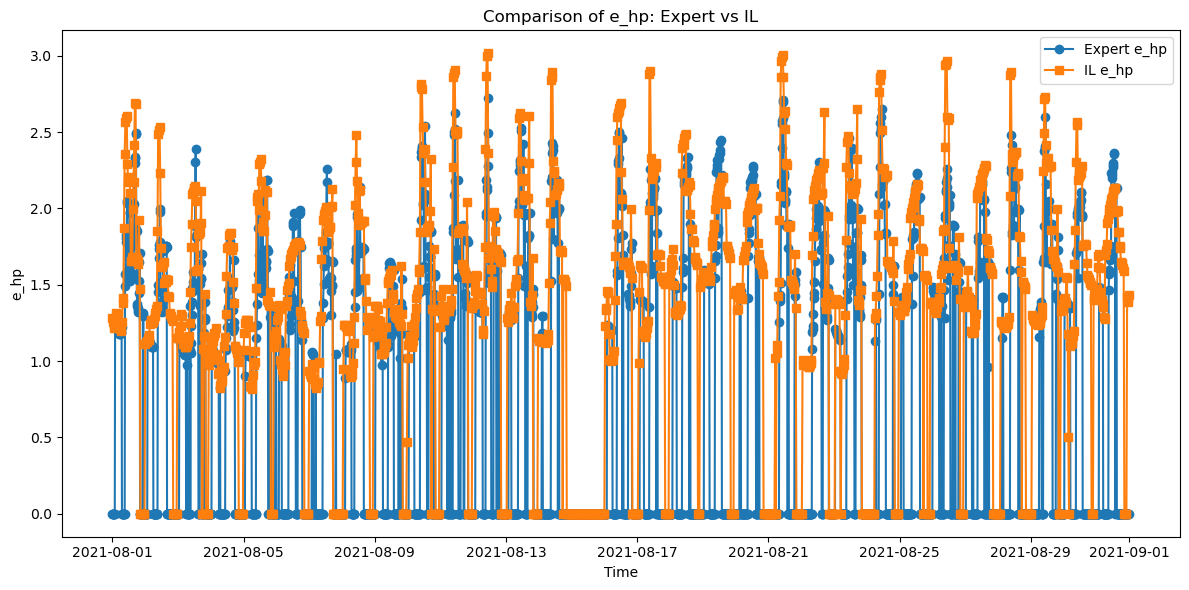

In [63]:
# Create a new figure with a specified size.
plt.figure(figsize=(12, 6))

# Plot the "e_hp" column for the expert DataFrame.
plt.plot(df_results_expert.index, df_results_expert['e_hp'], label='Expert e_hp', marker='o')

# Plot the "e_hp" column for the IL DataFrame.
plt.plot(df_results_IL.index, df_results_IL['e_hp'], label='IL e_hp', marker='s')

# Add title and labels.
plt.title('Comparison of e_hp: Expert vs IL')
plt.xlabel('Time')
plt.ylabel('e_hp')

# Enable the legend.
plt.legend()

# Improve layout and display the plot.
plt.tight_layout()
plt.show()